In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

from acquire import get_telco_data
from wrangle import wrangle_telco

In [2]:
df = wrangle_telco()

In [3]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,contract_type,payment_type,internet_service_type,churn
0,0003-MKNFE,Male,0,No,No,9,59.9,542.40,Yes,Yes,...,No,No,No,No,Yes,No,Month-to-month,Mailed check,DSL,No
1,0004-TLHLJ,Male,0,No,No,4,73.9,280.85,Yes,No,...,No,Yes,No,No,No,Yes,Month-to-month,Electronic check,Fiber optic,Yes
2,0011-IGKFF,Male,1,Yes,No,13,98.0,1237.85,Yes,No,...,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Electronic check,Fiber optic,Yes
3,0013-EXCHZ,Female,1,Yes,No,3,83.9,267.40,Yes,No,...,No,No,Yes,Yes,No,Yes,Month-to-month,Mailed check,Fiber optic,Yes
4,0013-MHZWF,Female,0,No,Yes,9,69.4,571.45,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Month-to-month,Credit card (automatic),DSL,No


In [4]:
df.streaming_tv

0                        No
1                        No
2                       Yes
3                       Yes
4                       Yes
               ...         
7038    No internet service
7039    No internet service
7040    No internet service
7041                     No
7042                    Yes
Name: streaming_tv, Length: 7043, dtype: object

### encode

In [5]:
# step 1 split
train, test = train_test_split(df)

In [6]:
# step 2 encode, no = 0, yes = 1 
encoder = LabelEncoder()

encode_list = [
    'gender', 'partner', 'dependents', 'phone_service'
    , 'multiple_lines', 'online_security', 'online_backup'
    , 'device_protection', 'tech_support'
    , 'streaming_movies', 'streaming_tv', 'paperless_billing', 'churn'
    ]
               
               
               
for c in encode_list:
    train[c] = encoder.fit_transform(train[c])
    test[c] = encoder.transform(test[c])

In [7]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,contract_type,payment_type,internet_service_type,churn
4847,6479-VDGRK,0,0,1,1,72,85.30,6129.20,1,0,...,2,2,2,2,2,0,Two year,Bank transfer (automatic),DSL,0
6278,7606-BPHHN,1,0,0,0,72,19.80,1468.75,1,0,...,1,1,1,1,1,1,Two year,Credit card (automatic),None,0
5867,7163-OCEQI,1,0,1,1,22,78.65,1663.75,1,2,...,0,2,2,2,2,1,One year,Mailed check,DSL,0
6796,9912-GVSEQ,0,1,1,0,26,93.85,2381.55,1,2,...,2,2,0,0,2,1,Month-to-month,Electronic check,Fiber optic,1
4471,6635-MYYYZ,0,0,0,0,30,85.35,2530.40,1,0,...,2,2,2,2,2,0,One year,Bank transfer (automatic),DSL,1


### Distribution of churn rates

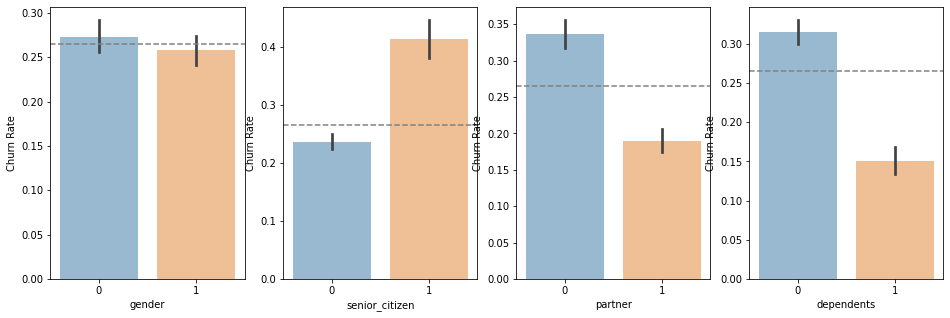

In [8]:
features = ['gender', 'senior_citizen', 'partner', 'dependents']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')


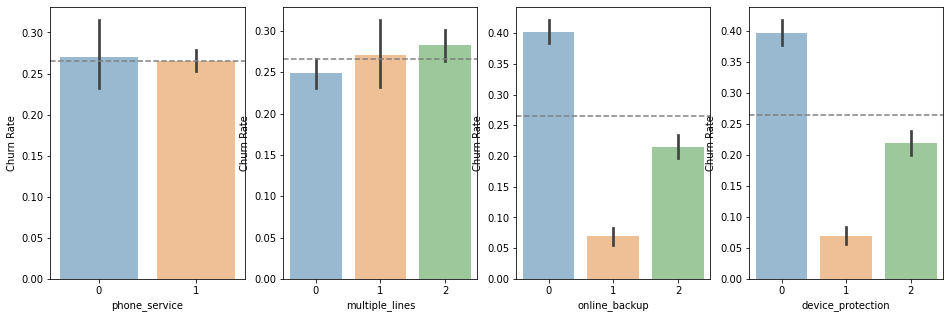

In [9]:
features = ['phone_service', 'multiple_lines', 'online_backup', 'device_protection']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [10]:
df.device_protection

0                        No
1                       Yes
2                       Yes
3                        No
4                        No
               ...         
7038    No internet service
7039    No internet service
7040    No internet service
7041                    Yes
7042                    Yes
Name: device_protection, Length: 7043, dtype: object

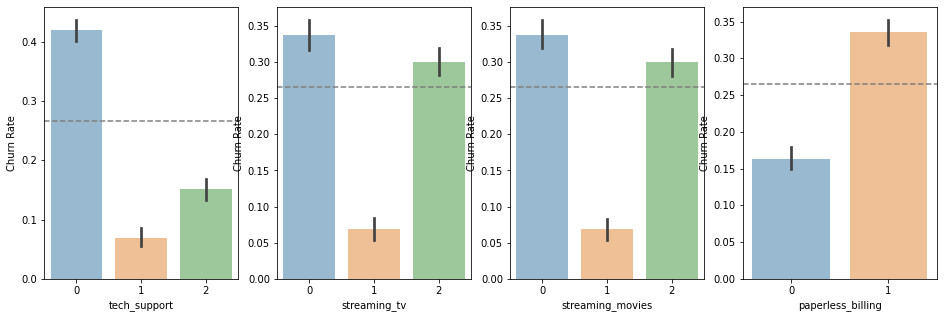

In [11]:
features = ['tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [12]:
df.contract_type.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64

### modeling

In [13]:
#encoding contract type 0 = month-to-month, 1 = two-year, 2 = one-year
encoder = LabelEncoder()
train['contract_type'] = encoder.fit_transform(train.contract_type)
test['contract_type'] = encoder.transform(test.contract_type)

In [14]:
# apply encoder to our contract type column

train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,contract_type,payment_type,internet_service_type,churn
4847,6479-VDGRK,0,0,1,1,72,85.30,6129.20,1,0,...,2,2,2,2,2,0,2,Bank transfer (automatic),DSL,0
6278,7606-BPHHN,1,0,0,0,72,19.80,1468.75,1,0,...,1,1,1,1,1,1,2,Credit card (automatic),None,0
5867,7163-OCEQI,1,0,1,1,22,78.65,1663.75,1,2,...,0,2,2,2,2,1,1,Mailed check,DSL,0
6796,9912-GVSEQ,0,1,1,0,26,93.85,2381.55,1,2,...,2,2,0,0,2,1,0,Electronic check,Fiber optic,1
4471,6635-MYYYZ,0,0,0,0,30,85.35,2530.40,1,0,...,2,2,2,2,2,0,1,Bank transfer (automatic),DSL,1


In [15]:
# creating our X, y and validate datasets

train, validate = train_test_split(train, random_state=123, test_size=.2)


X_train = train[['senior_citizen', 'multiple_lines', 'streaming_tv', 'paperless_billing', 'contract_type']]
y_train = train[['churn']]
X_val = validate[['senior_citizen', 'multiple_lines', 'streaming_tv', 'paperless_billing', 'contract_type']]
y_val = validate[['churn']]
X_test = test[['senior_citizen', 'multiple_lines', 'streaming_tv', 'paperless_billing', 'contract_type']]
y_test = test[['churn']]

# KNN

In [16]:
# training and fitting a k-nearest neighbors algorithim to our training data
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [17]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.74


In [18]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,2756,341
1,768,360


In [19]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      3097
           1       0.51      0.32      0.39      1128

    accuracy                           0.74      4225
   macro avg       0.65      0.60      0.61      4225
weighted avg       0.71      0.74      0.72      4225



### Accuracy on validation set

In [20]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_val, y_val)))

Accuracy of KNN classifier on validate set: 0.74


### messing with something i found on towards data science lol

In [21]:
X = train.drop(columns=['customer_id', 'churn', 'payment_type', 'internet_service_type'])
y = train.churn.to_numpy()
y[0:5]

array([1, 1, 0, 1, 1])

In [22]:
# cross validation is suppose to make our model more accurate somehow...blackbox'in'itt
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.75059102 0.75413712 0.75739645 0.75118483 0.72748815]
cv_scores mean:0.748159513574768


In [23]:
# hypertuning mode parameters
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 11}

In [25]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7820118343195266

## Random Forest 

In [26]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [27]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

In [28]:
# evaluating model
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.74


In [29]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,2995,102
1,990,138


In [30]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85      3097
           1       0.57      0.12      0.20      1128

    accuracy                           0.74      4225
   macro avg       0.66      0.54      0.52      4225
weighted avg       0.70      0.74      0.67      4225



### Validate scores

In [31]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_val, y_val)))

Accuracy of random forest classifier on test set: 0.75
